# Лабораторная работа №8. Кластеризация

**Студент:** Коньшин Никита  
**Группа:** ИТ-3,4

## 1. Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances

# Настройка отображения
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 10

## 2. Загрузка данных

Загружаем данные о координатах звёзд из CSV-файла. Файл использует точку с запятой как разделитель и запятую как десятичный разделитель.

In [2]:
# Загрузка данных с учётом формата файла
df = pd.read_csv('27_B_17834.csv', sep=';', decimal=',')

print(f"Загружено {len(df)} звёзд")
print(f"\nПервые 5 строк:")
df.head()

Загружено 9900 звёзд

Первые 5 строк:


,X,Y
0,7.084,7.959
1,-0.759,5.781
2,6.736,4.640
3,7.899,7.361
4,0.297,5.932


In [3]:
# Информация о данных
print("Информация о датасете:")
print(df.info())
print("\nСтатистика:")
df.describe()

Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9900 entries, 0 to 9899
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       9900 non-null   float64
 1   Y       9900 non-null   float64
dtypes: float64(2)
memory usage: 154.8 KB
None

Статистика:


,X,Y
count,9900.000000,9900.000000
mean,3.954999,3.518106
std,3.302652,3.139456
min,-2.972000,-3.974000
25%,1.382000,0.804500
50%,3.974500,4.347500
75%,6.551500,5.991250
max,10.971000,8.974000


## 3. Визуализация исходных данных

Построим карту звёздного неба с исходными данными.

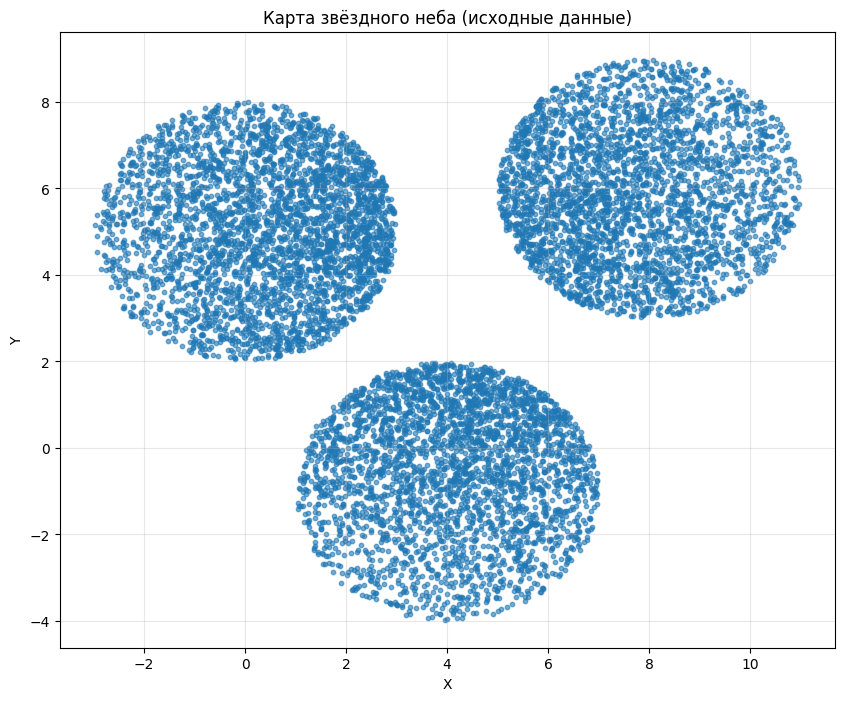

In [4]:
plt.figure(figsize=(10, 8))
plt.scatter(df['X'], df['Y'], s=10, alpha=0.6)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Карта звёздного неба (исходные данные)')
plt.grid(True, alpha=0.3)
plt.show()

## 4. Кластеризация методом K-Means

Применяем алгоритм K-Means для разбиения звёзд на 3 кластера. Алгоритм K-Means:
1. Случайно выбирает начальные центры кластеров
2. Назначает каждую точку ближайшему центру
3. Пересчитывает центры как среднее положение точек в кластере
4. Повторяет шаги 2-3 до сходимости

In [5]:
# Подготовка данных для кластеризации
X = df[['X', 'Y']].to_numpy()

# Применение K-Means с 3 кластерами
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
labels = kmeans.fit_predict(X)

# Добавление меток кластеров в датафрейм
df['cluster'] = labels

# Вывод количества звёзд в каждом кластере
print("Распределение звёзд по кластерам:")
print(df['cluster'].value_counts().sort_index())

Распределение звёзд по кластерам:
cluster
0    3500
1    3200
2    3200
Name: count, dtype: int64


## 5. Визуализация кластеров

Отобразим результаты кластеризации с разными цветами для каждого кластера.

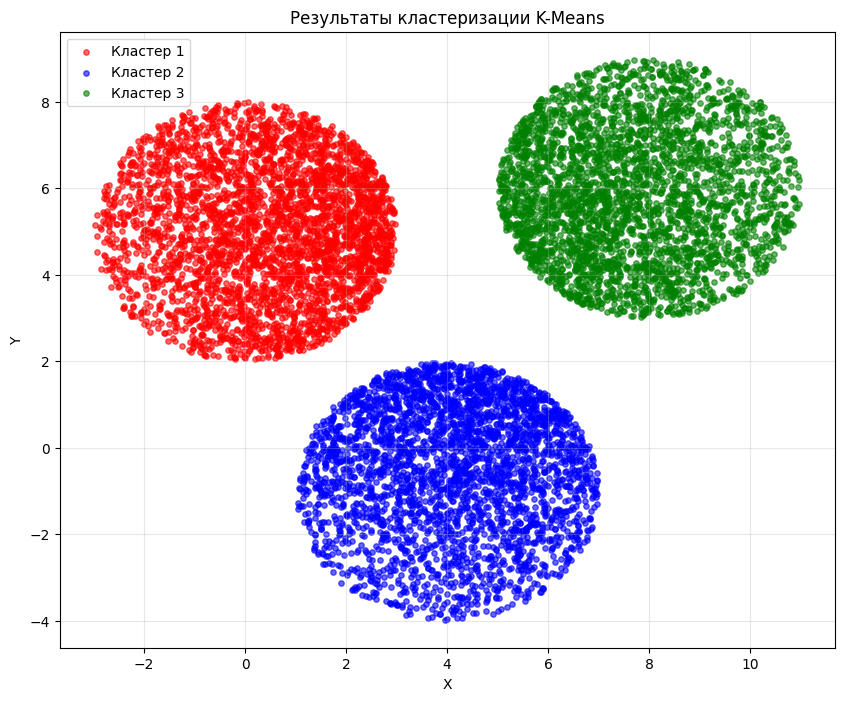

In [6]:
plt.figure(figsize=(10, 8))
colors = ['red', 'blue', 'green']
for i in range(3):
    cluster_data = df[df['cluster'] == i]
    plt.scatter(cluster_data['X'], cluster_data['Y'], 
                c=colors[i], label=f'Кластер {i+1}', s=15, alpha=0.6)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Результаты кластеризации K-Means')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 6. Поиск центроидов (медоидов)

**Центроид (медоид)** - это реальная точка из кластера, для которой сумма расстояний до всех остальных точек кластера минимальна.

Алгоритм поиска медоида:
1. Для каждой точки в кластере вычисляем расстояния до всех остальных точек кластера
2. Суммируем эти расстояния
3. Выбираем точку с минимальной суммой расстояний

In [7]:
def medoid_of_cluster(points_2d: np.ndarray) -> np.ndarray:
    """
    Находит медоид кластера - точку с минимальной суммой расстояний до всех остальных точек.
    
    Параметры:
    ----------
    points_2d : np.ndarray
        Массив координат точек кластера (N x 2)
    
    Возвращает:
    -----------
    np.ndarray
        Координаты медоида (x, y)
    """
    # Вычисляем матрицу попарных расстояний
    D = pairwise_distances(points_2d, metric='euclidean')
    
    # Суммируем расстояния для каждой точки
    sums = D.sum(axis=1)
    
    # Находим индекс точки с минимальной суммой
    idx = np.argmin(sums)
    
    return points_2d[idx]

In [8]:
# Находим медоиды для каждого кластера
medoids = []
for k in sorted(df['cluster'].unique()):
    # Извлекаем точки текущего кластера
    pts = df.loc[df['cluster'] == k, ['X', 'Y']].to_numpy()
    
    # Находим медоид
    m = medoid_of_cluster(pts)
    medoids.append(m)

medoids = np.array(medoids)
print("Координаты медоидов (центроидов):")
print(medoids)

Координаты медоидов (центроидов):
[[ 0.549  5.016]
 [ 4.146 -0.294]
 [ 7.563  5.851]]


## 7. Результаты

Выводим координаты центроидов (медоидов) для каждого кластера.

In [9]:
print("="*60)
print("КООРДИНАТЫ ЦЕНТРОИДОВ (МЕДОИДОВ) КЛАСТЕРОВ")
print("="*60)
for i, (mx, my) in enumerate(medoids, start=1):
    print(f"Кластер {i}: центроид (медоид) = ({mx:.3f}, {my:.3f})")
print("="*60)

КООРДИНАТЫ ЦЕНТРОИДОВ (МЕДОИДОВ) КЛАСТЕРОВ
Кластер 1: центроид (медоид) = (0.549, 5.016)
Кластер 2: центроид (медоид) = (4.146, -0.294)
Кластер 3: центроид (медоид) = (7.563, 5.851)


## 8. Финальная визуализация

Отображаем кластеры вместе с их центроидами (медоидами). Центроиды отмечены крестиками.

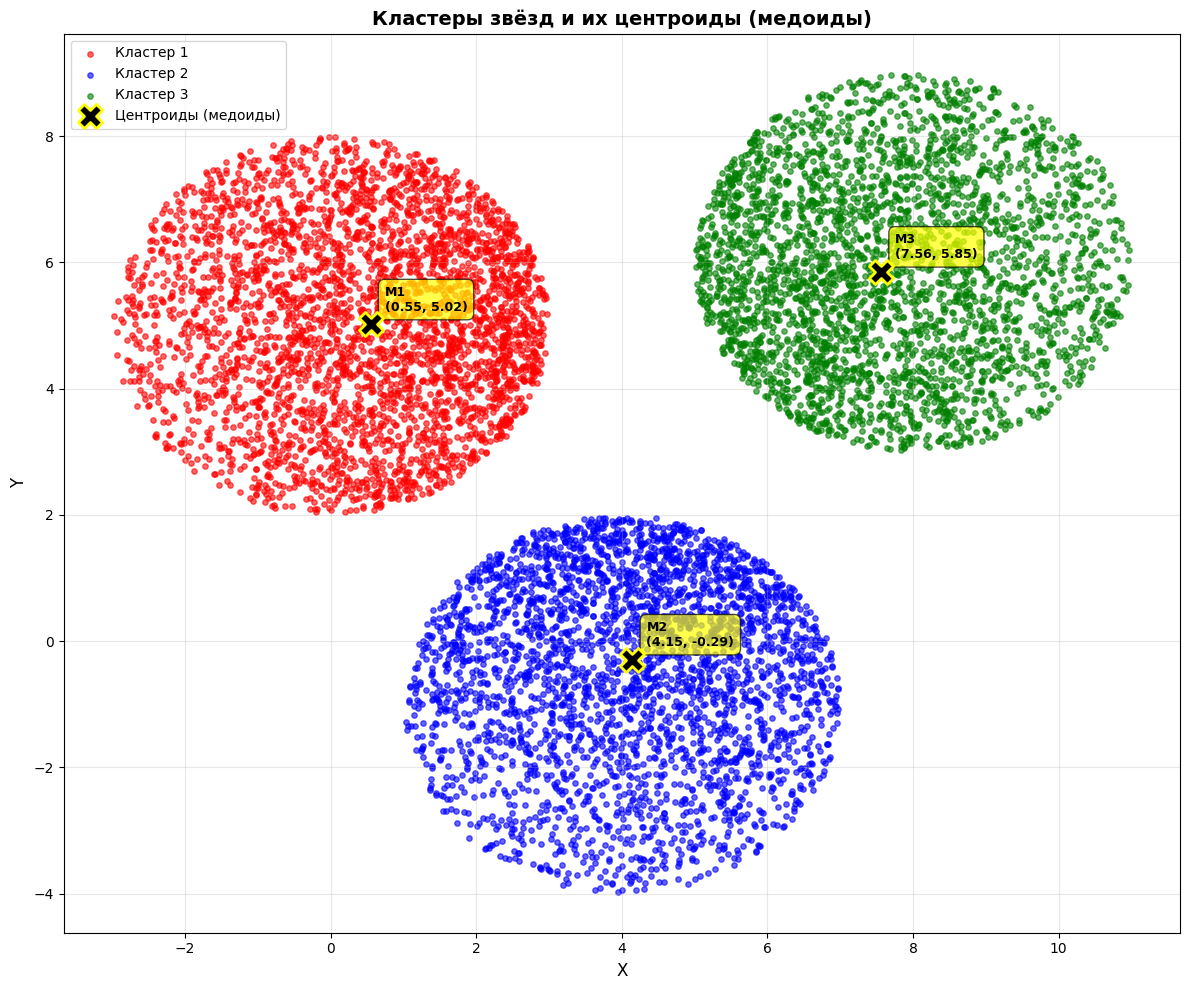

In [10]:
plt.figure(figsize=(12, 10))

# Отображаем точки кластеров
colors = ['red', 'blue', 'green']
for i in range(3):
    cluster_data = df[df['cluster'] == i]
    plt.scatter(cluster_data['X'], cluster_data['Y'], 
                c=colors[i], label=f'Кластер {i+1}', s=15, alpha=0.6)

# Отображаем медоиды
plt.scatter(medoids[:, 0], medoids[:, 1], 
            marker='X', s=300, c='black', 
            edgecolors='yellow', linewidths=2,
            label='Центроиды (медоиды)', zorder=5)

# Подписываем медоиды
for i, (mx, my) in enumerate(medoids, start=1):
    plt.annotate(f'M{i}\n({mx:.2f}, {my:.2f})', 
                xy=(mx, my), xytext=(10, 10),
                textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.7),
                fontsize=9, fontweight='bold')

plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.title('Кластеры звёзд и их центроиды (медоиды)', fontsize=14, fontweight='bold')
plt.legend(loc='best', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Выводы

В ходе выполнения лабораторной работы:

1. **Загружены данные** о координатах звёзд из файла 

2. **Применён алгоритм K-Means** для разбиения звёзд на 3 кластера. Алгоритм успешно идентифицировал три группы звёзд на карте звёздного неба.

3. **Найдены центроиды (медоиды)** каждого кластера - реальные звёзды, для которых сумма расстояний до всех остальных звёзд в кластере минимальна.

4. **Визуализированы результаты** кластеризации с отображением центроидов.

**Практическое значение:**
- Кластеризация звёзд позволяет выявить структуру звёздного неба
- Центроиды представляют собой "центральные" звёзды каждой группы
- Метод может применяться для классификации астрономических объектов и анализа их распределения